In [4]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy
import seaborn as sns

### Exercice 1

Le jeu de données contient les températures mensuelles moyennes de différentes villes. Les moyennes et amplitudes annuelles sont indiquées en plus, ainsi que les coordonnées géographiques (latitude, longitude). Une variable qualitative indique l’aire géographique (nord, sud, est, ouest). L’objectif ici est de dresser une typologie des villes en utilisant seulement les températures mensuelles et de valider l’analyse ensuite avec les variables supplémentaires.

In [6]:
temperature = pd.read_csv("temperature.csv", sep=";")

#### Description des données
On va d'abord inspecter les caractéristiques principales du jeu de données.

In [9]:
print(temperature.head(4))
print(temperature.shape)
print(temperature.columns[1:])
print(temperature.iloc[:,0].to_string(index=False))
temperature

   Unnamed: 0  January  February  March  April   May  June  July  August  \
0  Amsterdam       2.9       2.5    5.7    8.2  12.5  14.8  17.1    17.1   
1     Athens       9.1       9.7   11.7   15.4  20.1  24.5  27.4    27.2   
2     Berlin      -0.2       0.1    4.4    8.2  13.8  16.0  18.3    18.0   
3    Brussels      3.3       3.3    6.7    8.9  12.8  15.6  17.8    17.8   

   September  October  November  December  Annual  Amplitude  Latitude  \
0       14.5     11.4       7.0       4.4     9.9       14.6      52.2   
1       23.8     19.2      14.6      11.0    17.8       18.3      37.6   
2       14.4     10.0       4.2       1.2     9.1       18.5      52.3   
3       15.0     11.1       6.7       4.4    10.3       14.4      50.5   

   Longitude   Area  
0        4.5   West  
1       23.5  South  
2       13.2   West  
3        4.2   West  
(35, 18)
Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'Dece

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Amplitude,Latitude,Longitude,Area
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,West
1,Athens,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,South
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,West
3,Brussels,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,West
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,East
5,Copenhagen,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3,North
6,Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,6.1,North
7,Elsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,North
8,Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,East
9,Krakow,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7,7.7,22.1,50.0,19.6,East


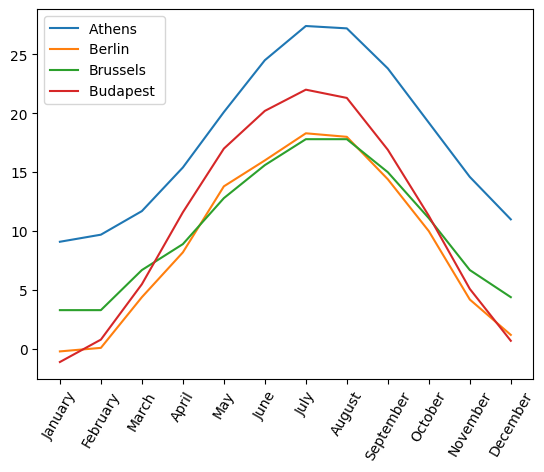

In [8]:
# Plot les températures pour les 4 premières villes 
ax = temperature.iloc[1:5,1:13].T.plot()
ax.set_xticks(numpy.arange(12))
ax.set_xticklabels(temperature.columns[1:13])
ax.tick_params(axis='x', labelrotation = 60)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, temperature.iloc[1:5,0])

### ACP du jeu de données:

On effectue l'ACP du jeu de données. Les individus 24 à 35 sont gardés en individus supplémentaires (pas des capitales). On n'utilise pas les variables qui ne sont pas des moyennes mensuelles, qu'on garde aussi en variables supplémentaires.

In [17]:
## PCA  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate capitals vs . non capital and keep only temperatures with .iloc
t_capital = temperature.iloc[0:23, 1:13]
# Standardise the data (ETAPE OBLIGATOIRE)
scaler = StandardScaler().fit(t_capital)
t_capital_norm = scaler.transform(t_capital)

# Create the PCA class and fit it to the data
pca = PCA()
temp_pca = pca.fit_transform(t_capital_norm)

On trace le nuage des individus:

In [18]:
# Data frame pour la visualisation 
# Transformation en DataFrame pandas
temp_pca = pca.transform(t_capital_norm)
pca_df = pd.DataFrame({
    "Dim1" : temp_pca[:,0], 
    "Dim2" : temp_pca[:,1],
    "City" : temperature.iloc[0:23,0],
    "Area" : temperature.iloc[0:23,17]
})

# Résultat (premières lignes)
pca_df.head()

,Dim1,Dim2,City,Area
0,0.226939,1.371379,Amsterdam,West
1,7.600672,-0.930376,Athens,South
2,-0.287858,-0.016454,Berlin,West
3,0.631174,1.177218,Brussels,West
4,1.668028,-1.712698,Budapest,East


Text(0, 0.5, 'Component 2')

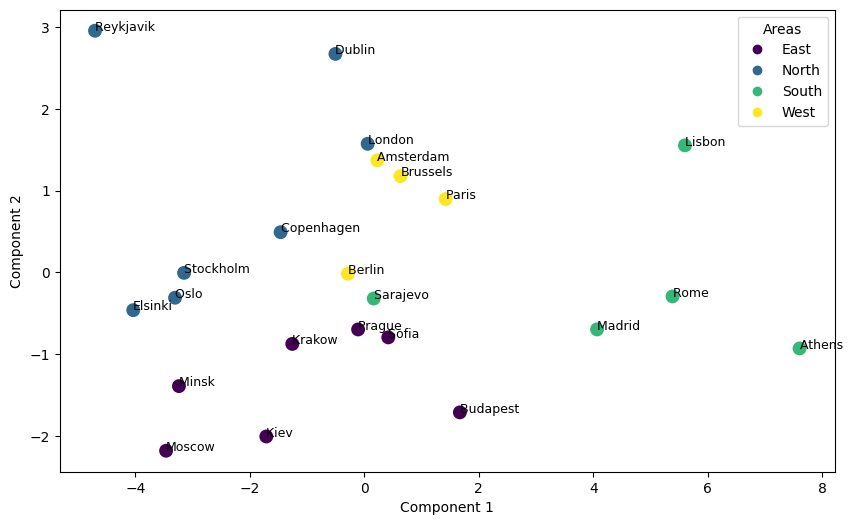

In [19]:
# Visualisation 
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()

area = list(pca_df.Area.unique())
area.sort()
scatter = ax.scatter(temp_pca[:,0], temp_pca[:,1], 
                     c = temperature.iloc[0:23,].Area.astype('category').cat.codes, edgecolor = 'none', s = 100)

for k in pca_df.iterrows():
    # Annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    ax.annotate(k[1]["City"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)

plt.legend(handles=scatter.legend_elements()[0], labels=area, title="Areas")
plt.xlabel('Component 1')
plt.ylabel('Component 2')

**Question 1:** Comment interpréter les deux premiers axes au vu des résultats ? 

Component 1 could represent latitude, avg T°C (colder cities have low values, better)  
Component 2 could represent longitude, amplitude (better), correspond to minus the amplitude

**Question 2:** Quelles sont les variables les plus corrélées à la composante 1 ? Et à la composante 2 ?

Pour trouver ces informations: L'objet ```pca``` comprend maintenant un certain nombre d'objets et de fonctions. Le premier est le tableau des variances expliquées (```explained_variance_```, proportionnelle aux valeurs propres) par dimension et le second le ratio (proportion) de variance expliquée par dimension (```explained_variance_ratio_```).   

In [20]:

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.03999209e+01 1.93163252e+00 1.31994704e-01 4.00340574e-02
 1.74689275e-02 1.34163555e-02 6.09530640e-03 2.12425170e-03
 1.06997216e-03 9.96078500e-04 5.61182639e-04 1.40291361e-04]
[8.28979202e-01 1.53970708e-01 1.05213170e-02 3.19112052e-03
 1.39245074e-03 1.06941964e-03 4.85857757e-04 1.69324411e-04
 8.52876360e-05 7.93975616e-05 4.47319495e-05 1.11826447e-05]


In [24]:
for num in pca.explained_variance_ratio_:
    print(f"{num:5f}")


0.828979
0.153971
0.010521
0.003191
0.001392
0.001069
0.000486
0.000169
0.000085
0.000079
0.000045
0.000011


Choisir des composantes pour gardeer 90% de la variance à minima
Les deux premières composantes expliquent 90% de la variance

*Rappel*: la corrélation se calcule comme produit scalaire de la variable avec la composante, divisée par la racine de leur variances.
On ré-obtient la corrélation à partir de $a$ et de $\lambda$ grâce à la formule de transition, qui nous donne $a_k = \frac{< X, c_k >}{n \lambda_k}$. On récupère les corrélations avec la composante $k$ en calculant $a_k \sqrt{\lambda_k}$.

In [29]:
n = t_capital.shape[0] # Nombre d'individus
p = t_capital.shape[1] # Nombre de variables

# Calcul des valeurs propres
eigval = ( (n-1) / n) * pca.explained_variance_  # On prend la variance des composantes ! Mais avec une correction du biais,
# car il faut débiaiser l'estimation de la variance faite par le package pca.
sqrt_eigval = numpy.sqrt(eigval) # Racine carrée de cette variance

corvar = numpy.zeros((p,p)) # Matrice vide pour avoir les coordonnées
for k in range(p):
    # pca.components_ contient les "a_k" 
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# On modifie pour avoir un dataframe
corvar_pd = pd.DataFrame({'id': t_capital.columns,
                          'COR_1': corvar[:,0],
                          'COR_2': corvar[:,1]})
# On a ainsi les corrélations entre variables et composantes.
corvar_pd

,id,COR_1,COR_2
0,January,0.842451,0.531358
1,February,0.884285,0.455833
2,March,0.945052,0.287313
3,April,0.973888,-0.099565
4,May,0.869852,-0.457812
5,June,0.833314,-0.545322
6,July,0.844163,-0.508662
7,August,0.909244,-0.401924
8,September,0.985625,-0.152536
9,October,0.991625,0.084765


Interessant de noter que les valeurs de COR1 sont positives ce qui est cohérent avec l'interprétation d'avg T°C positive.

**Question 3:** Quelle est la part de variance expliquée par les 2 premières composantes ? Est-il utile de considérer les composantes suivantes pour ce jeu de données ?

In [31]:
# Data frame pour la visualisation 
# Transformation en DataFrame pandas
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(12)], 
        "Variance expliquée" : pca.explained_variance_,
        "% Variance expliquée" : pca.explained_variance_ratio_ * 100,
        "% Cum. var. expliquée" : numpy.cumsum(pca.explained_variance_ratio_) * 100
    }
)
eig

,Dimension,Variance expliquée,% Variance expliquée,% Cum. var. expliquée
0,Dim1,10.399921,82.897920,82.897920
1,Dim2,1.931633,15.397071,98.294991
2,Dim3,0.131995,1.052132,99.347123
3,Dim4,0.040034,0.319112,99.666235
4,Dim5,0.017469,0.139245,99.805480
5,Dim6,0.013416,0.106942,99.912422
6,Dim7,0.006095,0.048586,99.961008
7,Dim8,0.002124,0.016932,99.977940
8,Dim9,0.001070,0.008529,99.986469
9,Dim10,0.000996,0.007940,99.994409


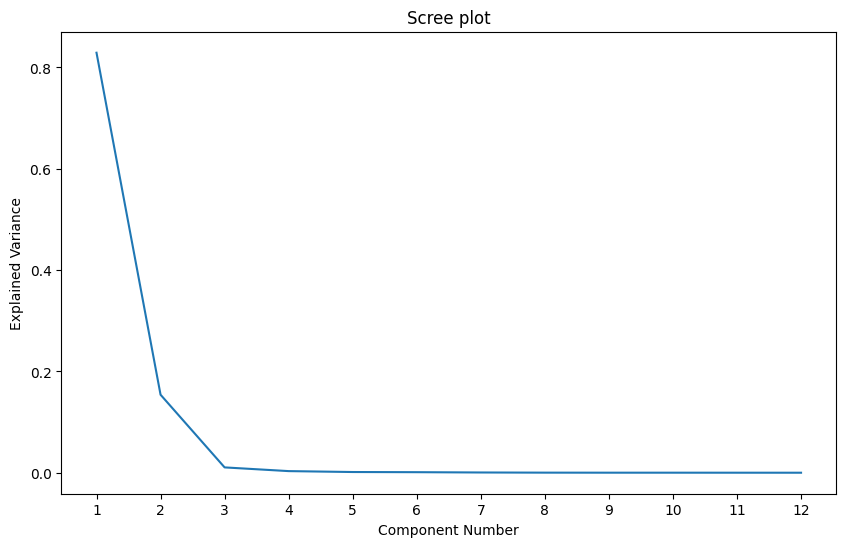

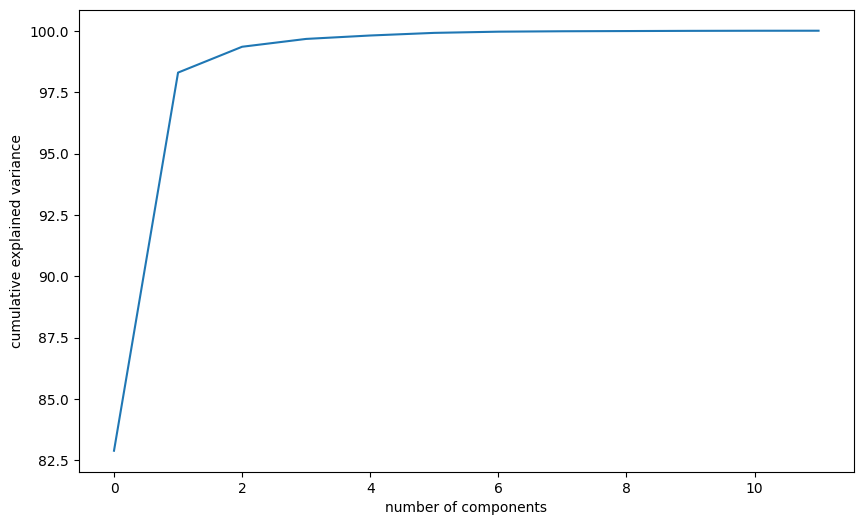

In [35]:
# Do a scree plot
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()

ind = numpy.arange(0, 12)
plt.plot(ind, pca.explained_variance_ratio_)
ax.set_xticks(ind)
ax.set_xticklabels(ind+1)
plt.title('Scree plot')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.show()

# Draw % of variance explained by the first components
plt.plot(numpy.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Question 4:** Donnez deux capitales représentatives de l’axe 1, à l’opposé sur l’axe. Considérer les contributions ou les cos$^2$ et repérer deux villes ayant des coordonnées de signes opposés (voir la visualisation !)

In [40]:
# Les composantes correspondent à la sortie du PCA:
# On pourrait aussi les récupérer facilement en calculant c = X a 
proj_comp = temp_pca

*Rappel*: Le calcul de la contribution d'un individu à une composante correspond à la coordonnée de cet individu dans cette composante au carré divisée par la valeur propre et le poids de l'individu: $\frac{(c_k^i)^2}{n \lambda_k}$
Il est possible d'obtenir ce résultat très simplement à partir de la simple variable ```proj_comp```. Comment ?

In [41]:
#contrib = proj_comp**2

In [44]:
# Data frame pour la visualisation 
# Transformation en DataFrame pandas
scores = pd.DataFrame(
    {
        "Individus" : temperature.iloc[0:23,0],
        # On multiplie par 100 pour un pourcentage
        "Score on Axe_1" : proj_comp[:,0] ,
        "Score on Axe_2" : proj_comp[:,1]
    }
)
scores

,Individus,Score on Axe_1,Score on Axe_2
0,Amsterdam,0.226939,1.371379
1,Athens,7.600672,-0.930376
2,Berlin,-0.287858,-0.016454
3,Brussels,0.631174,1.177218
4,Budapest,1.668028,-1.712698
5,Copenhagen,-1.462395,0.492056
6,Dublin,-0.505241,2.673497
7,Elsinki,-4.036297,-0.462039
8,Kiev,-1.712220,-2.007598
9,Krakow,-1.258657,-0.874989


On va ensuite calculer le cosinus de l'angle entre individu et composantes. Si on travaille dans l'espace cible déterminé par les nouveaux axes, les valeurs sont très simples à obtenir ! Que représentent ces valeurs ? Quel est l'intérêt du cosinus au carré lorsqu'on travaille sur plusieurs dimensions ? 

In [45]:
contrib = (proj_comp**2) / (eigval * n )

In [49]:
contrib_pd = pd.DataFrame(
    {
        "Individus" : temperature.iloc[0:23,0],
        # On multiplie par 100 pour un pourcentage
        "Contribution on Axe_1" : contrib[:,0] * 100,
        "Contribution on Axe_2" : contrib[:,1] * 100,
        "Score on Axe_1" : proj_comp[:,0],
        "Score on Axe_2" : proj_comp[:,1]
    }
)
contrib_pd

,Individus,Contribution on Axe_1,Contribution on Axe_2,Score on Axe_1,Score on Axe_2
0,Amsterdam,0.022509,4.425554,0.226939,1.371379
1,Athens,25.249412,2.036899,7.600672,-0.930376
2,Berlin,0.036216,0.000637,-0.287858,-0.016454
3,Brussels,0.174118,3.261117,0.631174,1.177218
4,Budapest,1.216058,6.902625,1.668028,-1.712698
5,Copenhagen,0.934710,0.569747,-1.462395,0.492056
6,Dublin,0.111569,16.819465,-0.505241,2.673497
7,Elsinki,7.120550,0.502355,-4.036297,-0.462039
8,Kiev,1.281346,9.484319,-1.712220,-2.007598
9,Krakow,0.692408,1.801599,-1.258657,-0.874989


In [53]:
cos2_proj = proj_comp**2 / (proj_comp**2).sum(axis=1, keepdims=True)

In [54]:
# Data frame pour la visualisation 
# Transformation en DataFrame pandas
contrib_pd = contrib_pd.assign(Cos2_axe_1 = cos2_proj[:,0], Cos2_axe_2 = cos2_proj[:,1])
contrib_pd

,Individus,Contribution on Axe_1,Contribution on Axe_2,Score on Axe_1,Score on Axe_2,Cos2_axe_1,Cos2_axe_2
0,Amsterdam,0.022509,4.425554,0.226939,1.371379,0.024748,0.903741
1,Athens,25.249412,2.036899,7.600672,-0.930376,0.978306,0.014658
2,Berlin,0.036216,0.000637,-0.287858,-0.016454,0.327900,0.001071
3,Brussels,0.174118,3.261117,0.631174,1.177218,0.216398,0.752780
4,Budapest,1.216058,6.902625,1.668028,-1.712698,0.463376,0.488526
5,Copenhagen,0.934710,0.569747,-1.462395,0.492056,0.805880,0.091237
6,Dublin,0.111569,16.819465,-0.505241,2.673497,0.034113,0.955178
7,Elsinki,7.120550,0.502355,-4.036297,-0.462039,0.956543,0.012534
8,Kiev,1.281346,9.484319,-1.712220,-2.007598,0.417330,0.573738
9,Krakow,0.692408,1.801599,-1.258657,-0.874989,0.645093,0.311755


In [56]:
# Higher contributions for score on Axe_1 for positive values
filtered_pd = contrib_pd[contrib_pd["Score on Axe_1"] > 0].sort_values(by = "Contribution on Axe_1", ascending = False)
filtered_pd

,Individus,Contribution on Axe_1,Contribution on Axe_2,Score on Axe_1,Score on Axe_2,Cos2_axe_1,Cos2_axe_2
1,Athens,25.249412,2.036899,7.600672,-0.930376,0.978306,0.014658
10,Lisbon,13.702914,5.685231,5.599288,1.554346,0.925544,0.071323
19,Rome,12.660034,0.202982,5.382001,-0.293699,0.995500,0.002965
12,Madrid,7.218868,1.145372,4.064067,-0.697665,0.934248,0.027532
4,Budapest,1.216058,6.902625,1.668028,-1.712698,0.463376,0.488526
16,Paris,0.880945,1.895907,1.419714,0.897599,0.694819,0.277737
3,Brussels,0.174118,3.261117,0.631174,1.177218,0.216398,0.752780
21,Sofia,0.076297,1.487539,0.417811,-0.795074,0.186273,0.674539
0,Amsterdam,0.022509,4.425554,0.226939,1.371379,0.024748,0.903741
20,Sarajevo,0.011677,0.240196,0.163452,-0.319489,0.078197,0.298759


In [57]:
# Higher contributions for score on Axe_2 for positive values
filtered_pd = contrib_pd[contrib_pd["Score on Axe_2"] > 0].sort_values(by = "Contribution on Axe_2", ascending = False)


**Question 5:** Procédez de même avec les individus supplémentaires (qui ont le rôle de données de validation), c'est à dire les villes n’étant pas des capitales.

Il faut ici d'abord projetter les individus supplémentaires à l'aide des axes obtenus avec les individus 'actifs', c'est à dire les capitales.

In [58]:
# On prend les villes restantes et on les standardise
t_cities = temperature.iloc[23:, 1:13]
t_cities_norm = scaler.transform(t_cities)

# On calcul les projections des nouveaux individus sur les axes connus
proj_comp_c = numpy.dot(t_cities_norm, pca.components_.T)
cos2_c = proj_comp_c**2 / (proj_comp_c**2).sum(axis=1, keepdims=True)

In [59]:
# Data frame pour la visualisation 
# Transformation en DataFrame pandas
contrib_pd_c = pd.DataFrame(
    {
        "Individus supplémentaires" : temperature.iloc[23:,0],
        "Cos2_axe_1" : cos2_c[:,0] ,
        "Cos2_axe_2" : cos2_c[:,1]
    }
)
contrib_pd_c

,Individus supplémentaires,Cos2_axe_1,Cos2_axe_2
23,Antwerp,0.195440,0.759999
24,Barcelona,0.993825,0.004070
25,Bordeaux,0.923363,0.060792
26,Edinburgh,0.229628,0.759768
27,Frankfurt,0.329607,0.051422
28,Geneva,0.363917,0.100276
29,Genoa,0.993338,0.000469
30,Milan,0.790678,0.192101
31,Palermo,0.968940,0.000769
32,Seville,0.997586,0.001072


**Question 6:** Quels sont les mois contribuant le plus à l'inertie sur l'axe 1 ? Sur l'axe 2?

In [60]:
# On calcule ces contributions en utilisant les coordonnées des variables dans l'espace cible 
contrib_v = (pca.components_.T**2) 
corvar_pd = corvar_pd.assign(Contribution_axe_1 = contrib_v[:,0]*100,
                             Contribution_axe_2 = contrib_v[:,1]*100)
corvar_pd

,id,COR_1,COR_2,Contribution_axe_1,Contribution_axe_2
0,January,0.842451,0.531358,7.134508,15.281095
1,February,0.884285,0.455833,7.860668,11.245822
2,March,0.945052,0.287313,8.978146,4.467768
3,April,0.973888,-0.099565,9.534387,0.536530
4,May,0.869852,-0.457812,7.606161,11.343687
5,June,0.833314,-0.545322,6.980597,16.094838
6,July,0.844163,-0.508662,7.163535,14.003582
7,August,0.909244,-0.401924,8.310674,8.743180
8,September,0.985625,-0.152536,9.765600,1.259292
9,October,0.991625,0.084765,9.884842,0.388876


**Question 7:** Calculer les corrélations et cos$^2$ pour les variables quantitatives additionnelles. À quelle composante principale pouvez-vous rattacher prioritairement chacune des variables supplémentaires ?

Notez que ces projections ne sont pas déjà disponibles, puisqu'on part de variables supplémentaires. Il faut les calculer manuellement. On peut se reservir de la formule de la question 2.

In [65]:
t_suppl = temperature.iloc[0:23, 13:17] # Variables supplémentaires
scaler_suppl = StandardScaler().fit(t_suppl) # Standardiser pour ces variables
t_suppl_norm = scaler_suppl.transform(t_suppl) # Variables normalisées

# On doit donc les projeter sur les composantes, et on divise par la racine carée de la variance
# On a toujours l'équivalence sqrt(lambda) * a = < X, c > / (n*sqrt(lambda))
corr_suppl = numpy.dot(t_suppl_norm.T, proj_comp)/ (n*sqrt_eigval) # On calcule les corrélations
corvar_suppl_pd = pd.DataFrame({'id': t_suppl.columns,
                            "Contribution_axe_1": corr_suppl[:,0],
                            "Contribution_axe_2": corr_suppl[:,1]})
corvar_suppl_pd

# this calcilation tells how the additional variables linearly
# relate to the patterns captured by each principal component
# A high absolute value of the correlation indicates a strong relationship 


,id,Contribution_axe_1,Contribution_axe_2
0,Annual,0.997548,0.068453
1,Amplitude,-0.314076,-0.944414
2,Latitude,-0.909911,0.215437
3,Longitude,-0.364458,-0.644973


In [66]:
# Ce sont les corrélations; comment obtenir très facilement les cos^2 ?
cos2_suppl = corr_suppl * 2/ (corr_suppl * 2).sum(axis=0, keepdims=True)
corvar_suppl_pd = corvar_suppl_pd.assign(Cos2_axe_1 = cos2_suppl[:,0],
                                         Cos2_axe_2 = cos2_suppl[:,1])
corvar_suppl_pd

,id,Contribution_axe_1,Contribution_axe_2,Cos2_axe_1,Cos2_axe_2
0,Annual,0.997548,0.068453,-1.688195,-0.052434
1,Amplitude,-0.314076,-0.944414,0.531524,0.723414
2,Latitude,-0.909911,0.215437,1.539882,-0.165023
3,Longitude,-0.364458,-0.644973,0.616789,0.494044


Tentons de visualiser tout cela dans le cercle des corrélations:

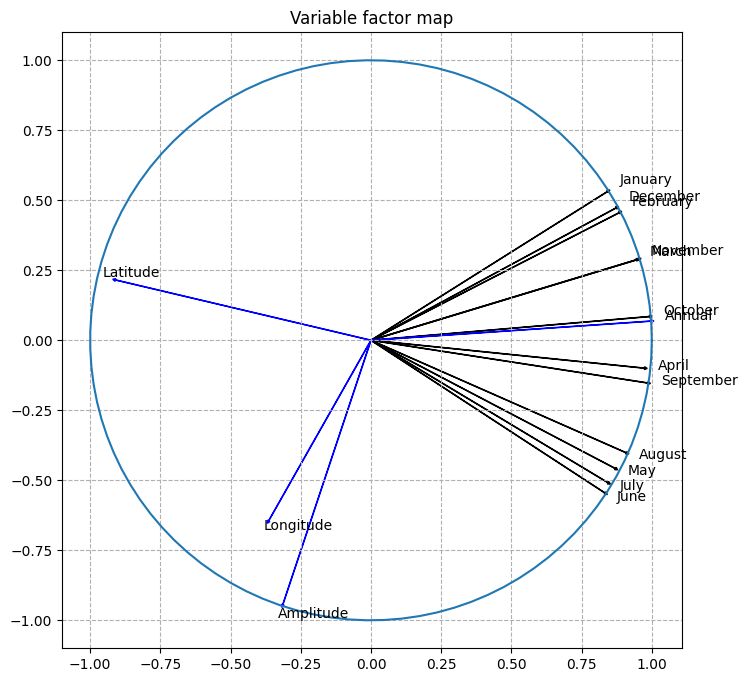

In [68]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, corvar.shape[0]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             corvar[i, 0],  #0 for PC1
             corvar[i, 1],  #1 for PC2
             head_width=0.01,
             color='black',
             head_length=0.01)

    plt.text(corvar[i, 0]*1.05,
             corvar[i, 1]*1.05,
             temperature.columns.values[i+1])
    
for i in range(0, corr_suppl.shape[0]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             corr_suppl[i, 0],  #0 for PC1
             corr_suppl[i, 1],  #1 for PC2
             head_width=0.01,
             head_length=0.01,
             color='blue')

    plt.text(corr_suppl[i, 0]*1.05,
             corr_suppl[i, 1]*1.05,
             temperature.columns.values[i+13])
    
an = numpy.linspace(0, 2 * numpy.pi, 100)
plt.plot(numpy.cos(an), numpy.sin(an))  # Add a unit circle for scale
plt.grid(True, linestyle="--")
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

**Question 8:** Concernant les variables qualitatives supplémentaires : chaque catégorie est identifiée au barycentre des individus qui la possèdent. À quelle composante la catégorie ’East’ est-elle le plus corrélée ? Quel est le signe de cette corrélation ?

In [72]:
# On récupère les catégories comme moyennes des villes qui en font partie
t_cat = temperature.iloc[0:23].filter(items = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Area']).groupby('Area',as_index=False).mean()
t_cat

,Area,January,February,March,April,May,June,July,August,September,October,November,December
0,East,-4.271429,-2.800000,1.585714,8.114286,14.071429,17.528571,19.257143,18.371429,13.971429,8.342857,2.385714,-1.985714
1,North,-0.871429,-0.657143,1.271429,5.114286,9.942857,13.800000,15.914286,14.942857,11.485714,7.228571,3.014286,0.642857
2,South,6.060000,7.320000,9.860000,13.020000,16.880000,20.680000,23.380000,23.240000,20.020000,15.500000,10.760000,7.320000
3,West,2.425000,2.400000,6.025000,8.750000,13.200000,15.725000,18.050000,17.900000,15.000000,11.250000,6.300000,3.800000


In [73]:
# On a donc 4 individus supplémentaires: on répète la procédure de tout à l'heure
t_cat_norm = scaler.transform(t_cat.iloc[:,1:13])
proj_comp_cat = numpy.dot(t_cat_norm, pca.components_.T)

In [75]:
cos2_cat_ = (proj_comp_cat**2) / (proj_comp_cat**2).sum(axis=1, keepdims=True)
cos2_cat = pd.DataFrame(
    {
        "Id" : numpy.unique(temperature['Area']),
        "Cos2 avec l'axe_1" : cos2_cat_[:,0],
        "Coordonée dans l'axe 1": proj_comp_cat[:,0],
        "Cos2 avec l'axe_2" : cos2_cat_[:,1],
        "Coordonée dans l'axe 2": proj_comp_cat[:,1]
    }
)
cos2_cat

,Id,Cos2 avec l'axe_1,Coordonée dans l'axe 1,Cos2 avec l'axe_2,Coordonée dans l'axe 2
0,East,0.379724,-1.099221,0.598700,-1.380244
1,North,0.849954,-2.443557,0.139066,0.988407
2,South,0.998169,4.561896,0.000905,-0.137377
3,West,0.232331,0.497492,0.690141,0.857435


**Question 9:** En se basant uniquement sur les deux premières composantes de l’ACP, peut-on deviner le signe de la corrélation entre ’amplitude’ et ’janvier’ ?

In [76]:
#On ressort les tableaux correspondants pour répondre:
corvar_pd

,id,COR_1,COR_2,Contribution_axe_1,Contribution_axe_2
0,January,0.842451,0.531358,7.134508,15.281095
1,February,0.884285,0.455833,7.860668,11.245822
2,March,0.945052,0.287313,8.978146,4.467768
3,April,0.973888,-0.099565,9.534387,0.536530
4,May,0.869852,-0.457812,7.606161,11.343687
5,June,0.833314,-0.545322,6.980597,16.094838
6,July,0.844163,-0.508662,7.163535,14.003582
7,August,0.909244,-0.401924,8.310674,8.743180
8,September,0.985625,-0.152536,9.765600,1.259292
9,October,0.991625,0.084765,9.884842,0.388876


In [78]:
# On vérifie leur corrélation:
corvar_suppl_pd

,id,Contribution_axe_1,Contribution_axe_2,Cos2_axe_1,Cos2_axe_2
0,Annual,0.997548,0.068453,-1.688195,-0.052434
1,Amplitude,-0.314076,-0.944414,0.531524,0.723414
2,Latitude,-0.909911,0.215437,1.539882,-0.165023
3,Longitude,-0.364458,-0.644973,0.616789,0.494044


**Conclusion:**  South = hot with variation  
North : coldn doesnt change much  
East : continental weather - wide variation of temperatures - kind of cold   
West : weather does not change much so it is cold with less variations  

### Exercice 2

On utilise les données JO . Les lignes correspondent à des disciplines olympiques, les colonnes à des pays. Chaque cellule contient le nombre de médailles (or/argent/bronze) gagnées par un pays entre 92 et 2008 (5 jeux, donc 15 médailles par discipline). On a bien une table de contingence (creuse) obtenue à partir de données originales binaires où chaque ligne correspond à une médaille, avec deux « 1 » par lignes (pays concerné et discipline), les cellules restantes valant 0. Il y a 24 disciplines. Pour charger la table de contingence et afficher la description des données :

In [ ]:
JO = pd.read_csv("JO.csv", sep=";")

In [ ]:
print(JO.head(4))
print(JO.shape)
print(JO.columns[:])
sports = JO.iloc[:,0].to_numpy()
sports

In [ ]:
#' On verifie qu'il y a bien 15 medailles par discipline:  
..

In [ ]:
# Nombre de médailles par pays
..

In [ ]:
#Le test du chi2 rejette largemement l'indépendence, mais n'est pas significatif
# car la condition n_{ij} > 5 pour tout (i,j)  n'est pas satisfaite. 
from scipy.stats import chi2_contingency
chi2_contingency(JO.iloc[:,1:])

**Question 1:** Inspectez les valeurs propres de l’AC. Combien faudrait-il garder de dimensions pour expliquer 50% de la variance ?

In [ ]:
import mca

On utilise le package ```mca```. C'est l'attribut ```.L``` de l'object ```MCA``` qui donne les valeurs propres.

In [ ]:
JO = JO.drop('   ', axis=1) # On retire la colonne des sports par praticité
mca_JO = mca.MCA(JO, benzecri=False)
..

**Question 2:** Vérifiez que l’inertie totale vaut $\frac{1}{n}$ fois la statistique du χ2.

L'attribut ```.inertia``` donne l'inertie totale.

In [ ]:
..

**Question 3:** Vérifiez que le barycentre des projections des profils lignes sur les deux premiers axes est le vecteur nul, lorsque l’on utilise comme poids les fréquences marginales.

In [ ]:
n = JO.to_numpy().sum()
# Pour les calculs: profils marginaux = fréquences de chaque ligne / colonne 
colW = ..
rowW = ..

Vérifions une première chose: le  barycentre des profils lignes (= lignes normalisées) est-il bien le profil marginal des colonnes ?

In [ ]:
rowprof = ..

In [ ]:
print(numpy.dot(rowW, rowprof) - colW) 

In [ ]:
# Les profils lignes PROJETES sont stockés dans:
row_proj = mca_JO.fs_r()
# Calcul du barycentre: 
..

In [ ]:
col_proj = mca_JO.fs_c()

**Question 4:** Vérifiez que la variance pondérée des coordonnées des lignes sur le premier axe est égale à la première valeur propre.

In [ ]:
# Variance des lignes sur le premier axe: 
print(..)
# Variance de la première coordonnée:
print(..)

**Question 5:** Vérifiez que la corrélation entre les vecteurs des coordonnées des profils lignes projetées sur l’axe 1 et l’axe 2 est nulle. Justifiez théoriquement ce résultat.

In [ ]:
# Comment obtenir simplement le signe de corrélation entre deux vecteurs ?
..

**Question 6:** Calculez les contributions des profils lignes à l’axe 1 en utilisant les poids, les coordonnées des lignes et les valeurs propres. 

In [ ]:
..

In [ ]:
# On retrouve ce résultat directement avec l'outil dédié.. ou pas, il ne semble pas fonctionner.
print(mca_JO.cont_r()[0])

**Question 7:** Interprétation des résultats :
- Comment interprétez-vous les axes de l’ACP des lignes en vu du graphe des profils lignes ?
- On cherche à dresser des profils de pays en termes de points forts disciplinaires. Ajoutez les pays au graphe.
- Calculez les contributions des pays à l’axe 1 en utilisant leurs poids, les coordonnées des colonnes et la première valeur propre (c.f. question 6)
- Quels sont les 5 pays contribuant le plus à l’inertie sur l’axe 1 ? De quel côté se situent les États-Unis par rapport à la direction ‘endurance’ ?

In [ ]:
# Visualisation 
plt.rcParams['figure.figsize'] = (6, 10)
fig, ax = plt.subplots()

scatter = ax.scatter(row_proj[:,0], row_proj[:,1], 
                     c = 'b')

for k in range(JO.shape[0]):
    # Annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    ax.annotate(sports[k], (row_proj[k,0], row_proj[k,1]), fontsize = 9)
         
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()

In [ ]:
# Visualisation complète !
plt.rcParams['figure.figsize'] = (6, 10)
fig, ax = plt.subplots()

scatter = ax.scatter(row_proj[:,0], row_proj[:,1], 
                     c = 'b')

for k in range(JO.shape[0]):
    ax.annotate(sports[k], (row_proj[k,0], row_proj[k,1]), fontsize = 9)
         
        
scatter = ax.scatter(col_proj[:,0], col_proj[:,1], 
                     c = 'r', marker='v')

for k in range(JO.shape[1]):
    ax.annotate(JO.columns.to_numpy()[k], (col_proj[k,0], col_proj[k,1]), fontsize = 9)
    
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()

In [ ]:
# Triez les pays suivant leurs contributions ! 
contr_country = ..

### Exercice 3

On charge les données ’banque’: ces données résultent d’une enquête auprès de 810 clients d’une banque et décrivent les clients suivant certaines caractéristiques. Nous retenons ici les variables ```age, sexe, interdit, credhab, credcon``` (4,5,6,12,13).

In [ ]:
banque = pd.read_csv("banque.csv", sep=",")
banque = banque[["age", "sexe","interdit","credhab","credcon"]]
banque.head()

In [ ]:
#Tableau disjonctif: 
dij=pd.DataFrame(pd.get_dummies(banque))
dij.head()

**Question 1:** Sans calcul, donnez la somme totale du tableau disjconctif, et celle de chaque ligne. Étudiez les effectifs de chaque modalité, et repérez les éventuelles modalités rares.

In [ ]:
#Vérifions quand même..
..

In [ ]:
# Calcul des effectifs
..

**Question 2:** On effectue une ACM:
- Calculez l’inertie totale, et donnez l’inertie relative de chaque axe.
- Retrouvez l’inertie totale à partir de la statistique du χ2 du tableau disjonctif.
- Quelles sont les trois catégories contribuant le plus à l’axe 1 ?
- Même question pour l’axe 2.

In [ ]:
mca_banque = mca.MCA(dij, benzecri=False)
# Inertie totale
..

In [ ]:
# Calcul des profils colonnes:
col_proj = mca_banque.fs_c()
.. 
# Trier les pays suivant leurs contributions
..

In [ ]:
# Même chose pour l'axe 2 !

In [ ]:
# Un peu de visualisation:
plt.rcParams['figure.figsize'] = (6, 8)
fig, ax = plt.subplots()

col=[1,1,1,1,1,2,2,3,3,4,4,5,5,5]
scatter = ax.scatter(col_proj[:,0], col_proj[:,1], 
                     c = col)

for k in range(dij.shape[1]):
    ax.annotate(dij.columns.to_numpy()[k], (col_proj[k,0], col_proj[k,1]), fontsize = 9)
         
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()

**Conclusion:** Dressez une typologie des clients, c'est à dire interprétez les axes à l’aide de la carte des
catégories et des variables. 